In [37]:
# Thjs code generates all the plots and the nescessary information
# Includes code for class distribution, random 25 samples, and pixel intensity distribution

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os
import numpy as np
import cv2 as cv

# Get current directory and go to it's parent directory
print(os.getcwd())
os.chdir("../concat_data")
print(os.listdir(os.getcwd()))



c:\Users\Luis\OneDrive\Concordia\Winter 2024\AI\project\repo\COMP472\unprocessed_merged_dataset
['concat_data.7z', 'focused', 'happy', 'neutral', 'normalized-greyscale.zip', 'surprised']


In [38]:

# Dictionary of images sorted by emotion
dict_images = {'focused': [], 'happy': [], 'neutral' : [], 'surprised': []}

# Attain all images from each emotion
for folder in os.listdir(os.getcwd()):
    print("Current folder: ", folder)
    if (folder == "Script"): # Skips the folder with script in it
        continue
  
    if (folder in dict_images.keys()) :
        for image in os.listdir(folder): # Checks through directory to find .jpg files
            if image.endswith('.jpg'):
                dict_images[folder].append(str(image)) # Stores in the dictionary with specific emotion index

for key in dict_images:
    print(key)
    print(len(dict_images[key]))


Current folder:  concat_data.7z
Current folder:  focused
Current folder:  happy
Current folder:  neutral
Current folder:  normalized-greyscale.zip
Current folder:  surprised
focused
500
happy
500
neutral
500
surprised
500


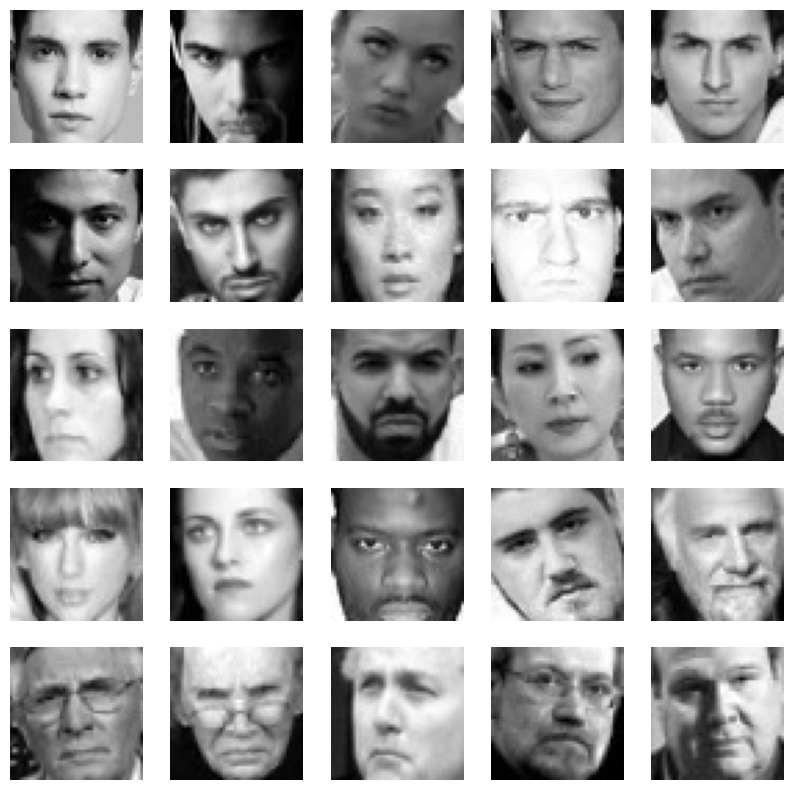

<Figure size 640x480 with 0 Axes>

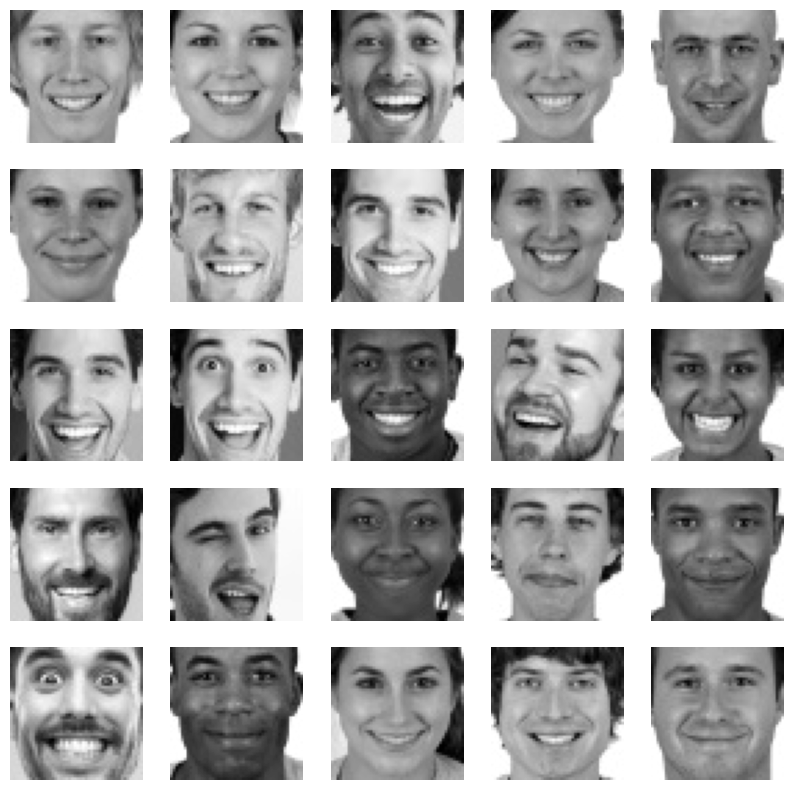

<Figure size 640x480 with 0 Axes>

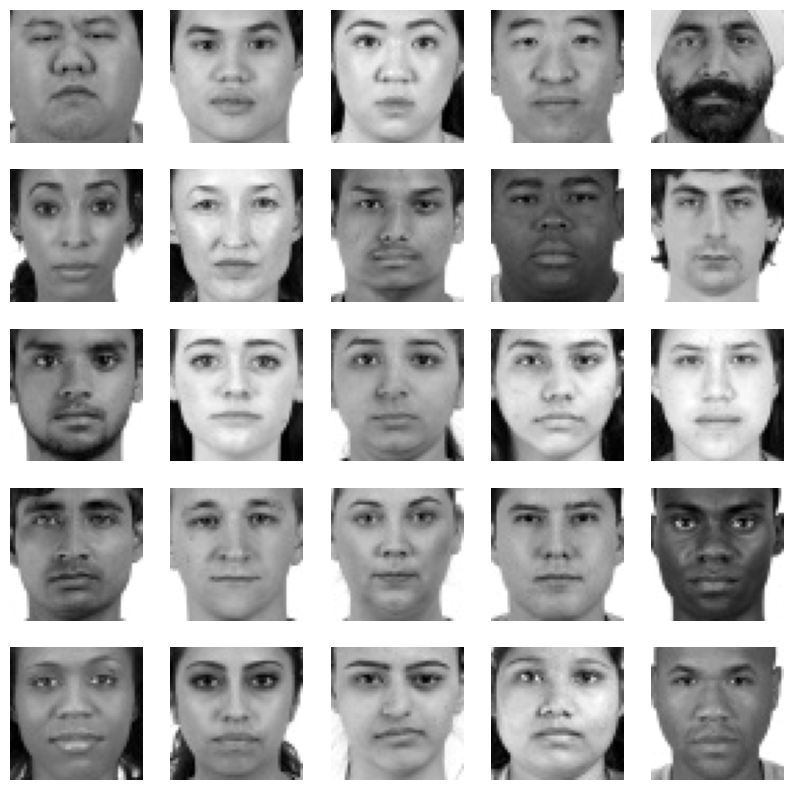

<Figure size 640x480 with 0 Axes>

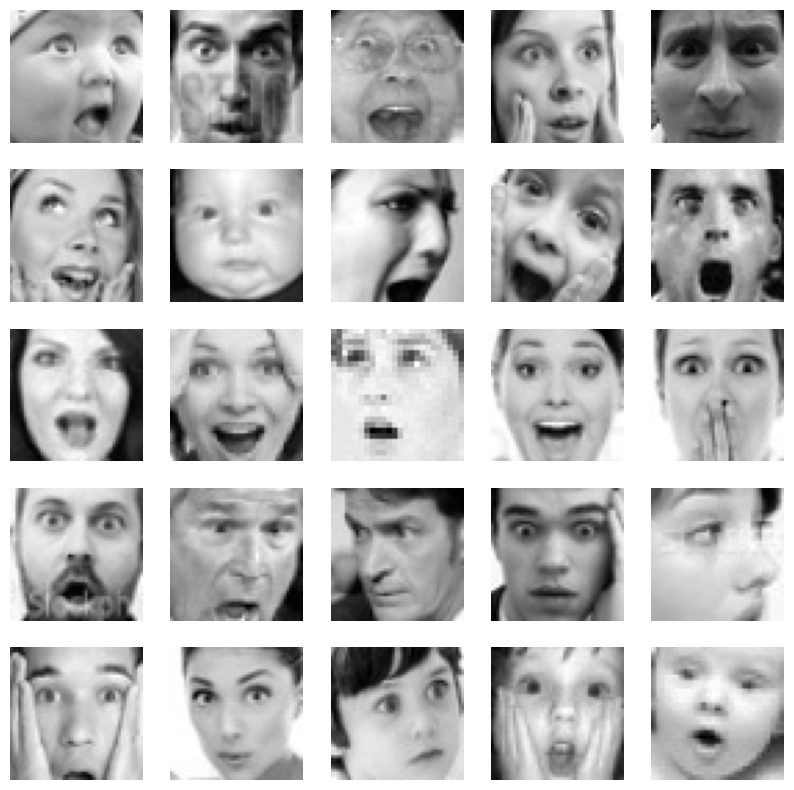

<Figure size 640x480 with 0 Axes>

In [39]:

# Plotting images in 5x5 grid    
rows = 5
columns = 5

chosen_images = {'focused': [], 'happy': [], 'neutral' : [], 'surprised': []}

# Plotting each emotion grid
for emotion in dict_images:
    # Shuffling the array and picking the first 25 images
    np.random.shuffle(dict_images[emotion])
    disp_img = dict_images[emotion][:25]

    fig = plt.figure(figsize=(10,10))
    
    for i, file_name in enumerate(disp_img):
       chosen_images[emotion].append(file_name)
       img = mpimg.imread(emotion + "/" + file_name)
       plt.subplot(rows, columns, i + 1)
      #  plt.imshow(img)
       plt.imshow(img, cmap='gray')
       plt.axis('off')
   

    plt.show()
    plt.savefig('../preprocessing/5x5_grid_%s.png'%(emotion))




In [40]:
#grab each category and append it to a list
dict_images_values = {'focused': {}, 'happy': {}, 'neutral' : {}, 'surprised': {}}

for folder in os.listdir(os.getcwd()):

   

    # iterage through the 25 selected images
    if (folder in chosen_images.keys()) :
        #generate a list for each R, G, and B value
        red_pixel_arr = []
        green_pixel_arr = []
        blue_pixel_arr = []
        for image in chosen_images[folder]:
            # print(image)

            img_array = cv.imread(folder + "/" + image)
            
            #convert to rgb
            img_array = cv.cvtColor(img_array, cv.COLOR_BGR2RGB)

            #flatten the 2D array into a 1 dimensional array
            #it will contain a pixel intensity array for
            # each R, G, and B value like so: [R, G, B, R, G, B, ...]

            img_array_1D = img_array.flatten()
            # print(len(img_array_1D))


            # iterate through the array and append to the respective array
            i = 0
            while i < len(img_array_1D):
                red_pixel_arr.append(img_array_1D[i])
                green_pixel_arr.append(img_array_1D[i+1])
                blue_pixel_arr.append(img_array_1D[i+2])
                i += 3

            # print(len(red_pixel_arr))

        # append the arrays to the dictionary
        dict_images_values[folder]['red'] = red_pixel_arr
        dict_images_values[folder]['green'] = green_pixel_arr
        dict_images_values[folder]['blue'] = blue_pixel_arr

# for key in dict_images_values:
#     print(key)
#     print(len(dict_images_values[key]['red']))
#     print(len(dict_images_values[key]['green']))
#     print(len(dict_images_values[key]['blue']))




generating graph for key: focused
generating graph for key: happy
generating graph for key: neutral
generating graph for key: surprised


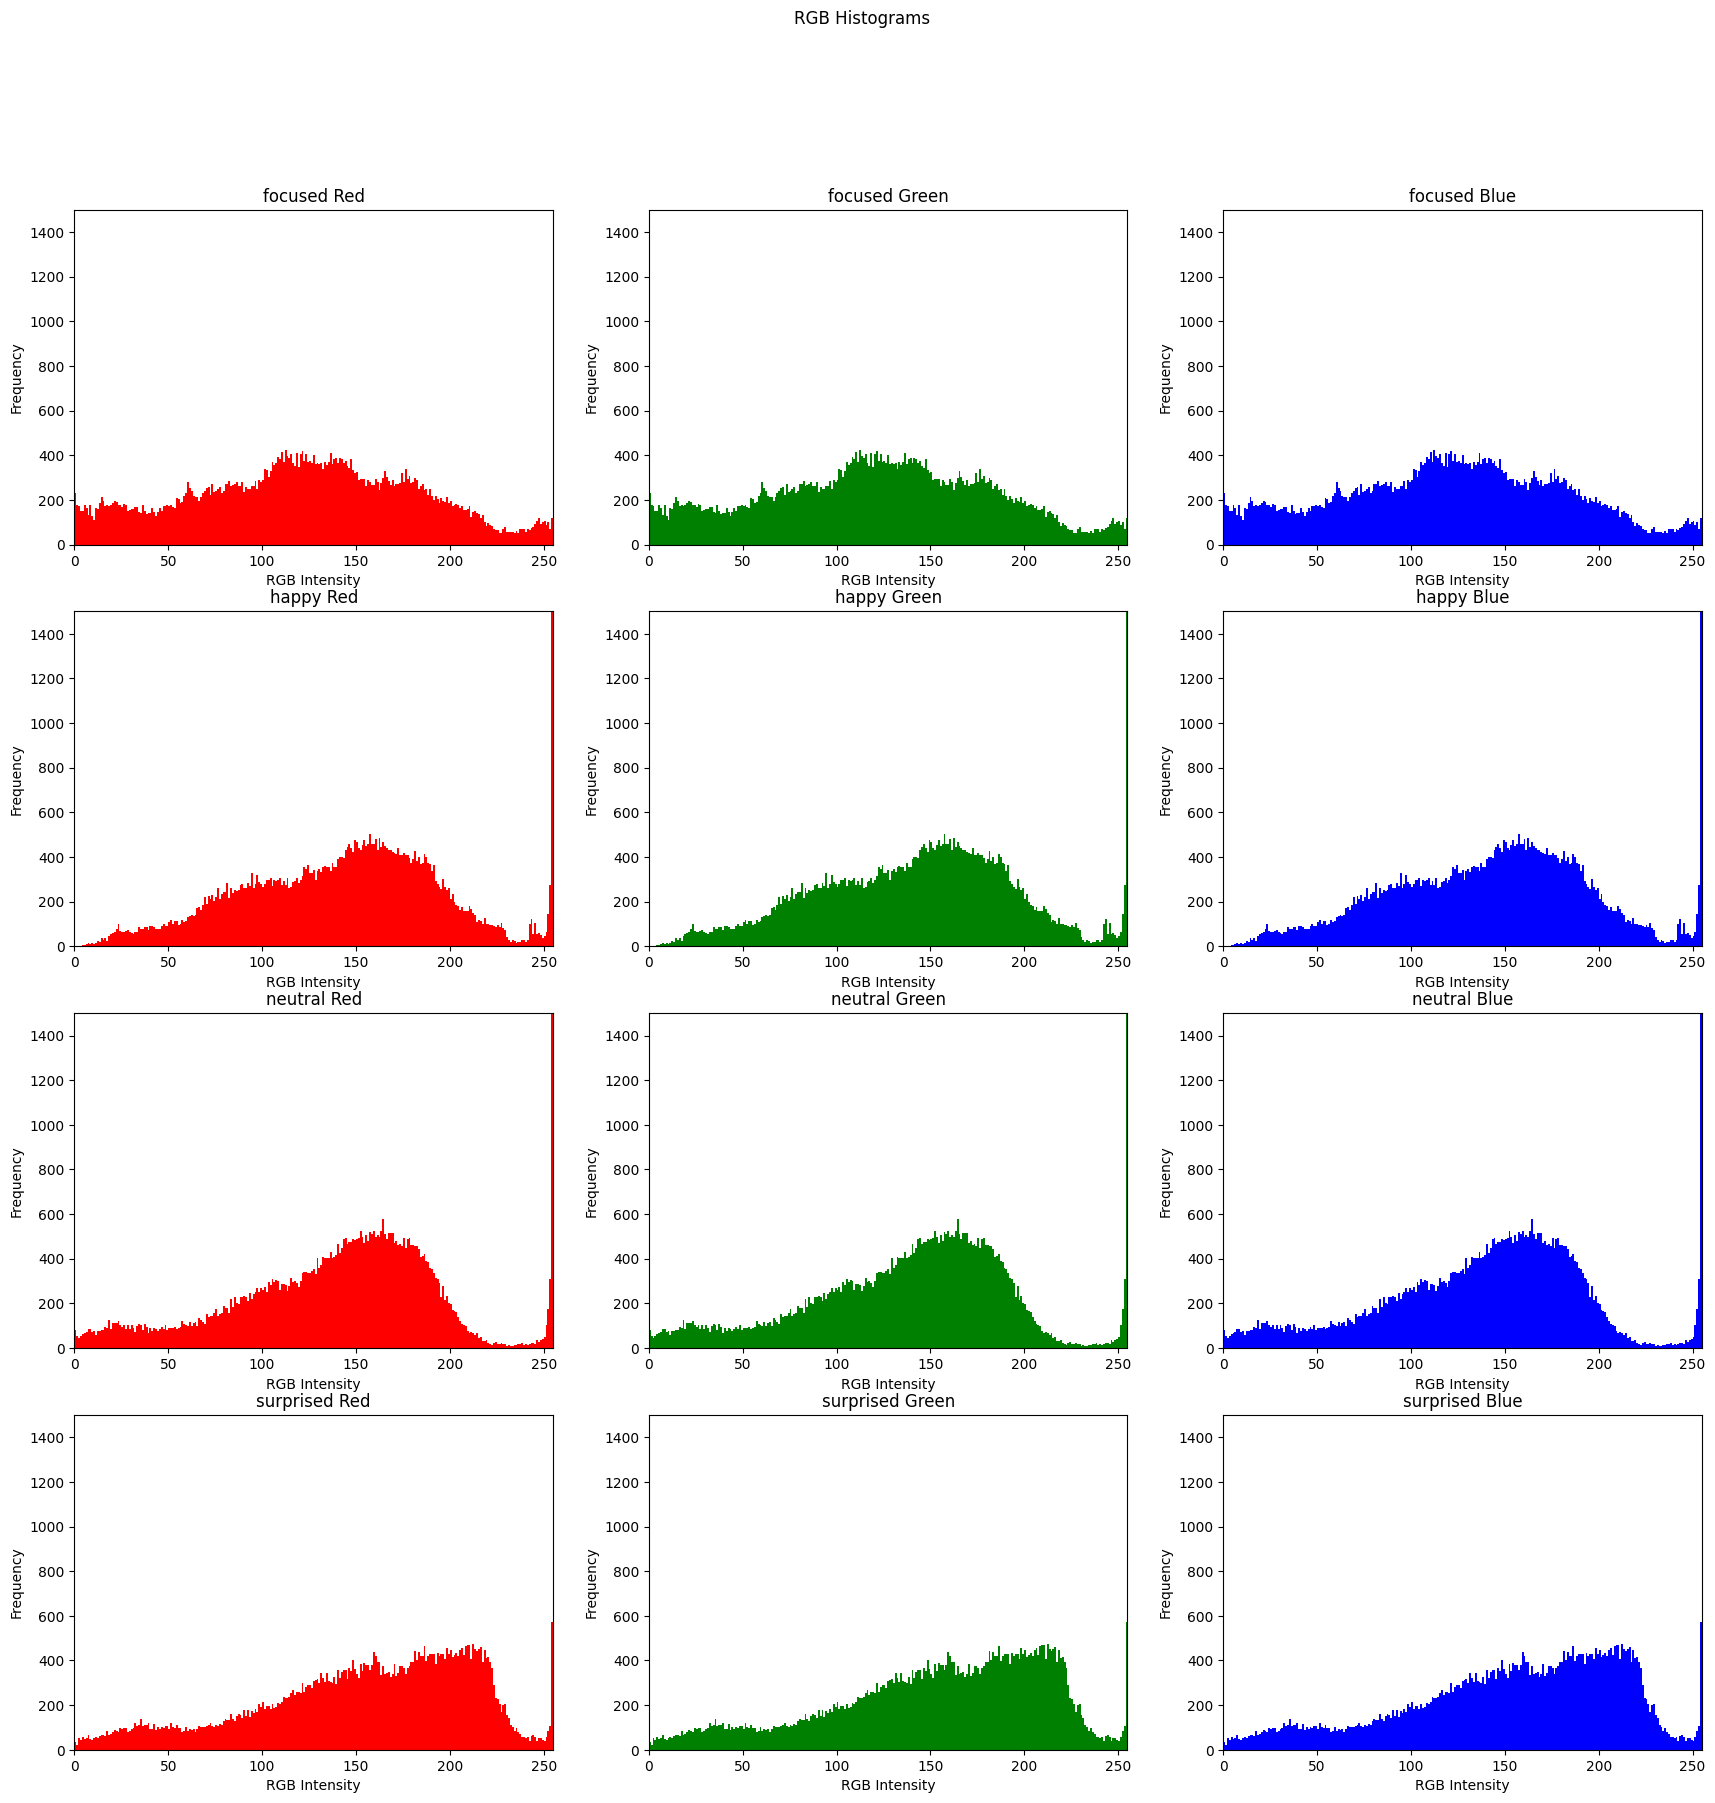

In [41]:

#make 3x4 plot for each folder
fig, axs = plt.subplots(4, 3)
fig.set_size_inches(21, 20)
fig.suptitle('RGB Histograms')

i = 0
for key in dict_images_values:
    #add title to each row
    print("generating graph for key: " + key)

    # set histogram values
    axs[i, 0].hist(dict_images_values[key]['red'], bins=255, color='red')
    axs[i, 1].hist(dict_images_values[key]['green'], bins=255, color='green')
    axs[i, 2].hist(dict_images_values[key]['blue'], bins=255, color='blue')

    # set histogram titles
    axs[i, 0].set_title(key + " Red")
    axs[i, 1].set_title(key + " Green")
    axs[i, 2].set_title(key + " Blue")

    #set histogram x-axis limits
    axs[i, 0].set_xlim([0, 255])
    axs[i, 1].set_xlim([0, 255])
    axs[i, 2].set_xlim([0, 255])

    #set y-axis limits
    axs[i, 0].set_ylim([0, 1500])
    axs[i, 1].set_ylim([0, 1500])
    axs[i, 2].set_ylim([0, 1500])

    #set x-label
    axs[i, 0].set_xlabel('RGB Intensity')
    axs[i, 1].set_xlabel('RGB Intensity')
    axs[i, 2].set_xlabel('RGB Intensity')

    #set y-label
    axs[i, 0].set_ylabel('Frequency')
    axs[i, 1].set_ylabel('Frequency')
    axs[i, 2].set_ylabel('Frequency')

    

    i = i + 1
        
#Export plot as a png
plt.savefig('../preprocessing/histogram_color.png')








generating grayscale graph for key: focused
generating grayscale graph for key: happy
generating grayscale graph for key: neutral
generating grayscale graph for key: surprised


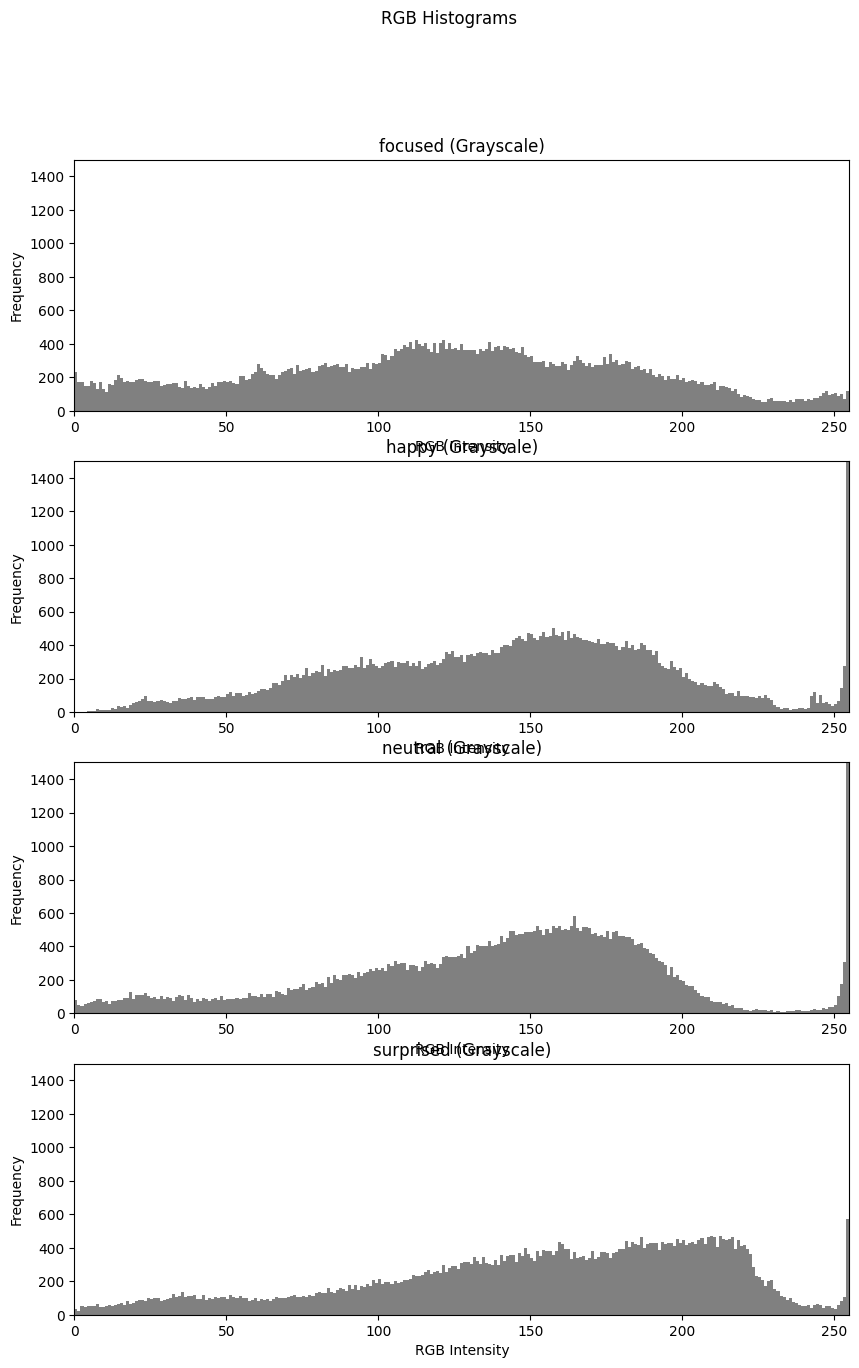

In [47]:
#make 3x4 plot for each folder
fig, axs = plt.subplots(4, 1)
fig.set_size_inches(21, 21)
fig.suptitle('RGB Histograms')

i = 0
for key in dict_images_values:
    #add title to each row
    print("generating grayscale graph for key: " + key)

    # set histogram values
    axs[i].hist(dict_images_values[key]['red'], bins=255, color='grey')

    # set histogram titles
    axs[i].set_title(key + " (Grayscale)")

    #set histogram x-axis limits
    axs[i].set_xlim([0, 255])

    #set y-axis limits
    axs[i].set_ylim([0, 1500])

    #set x-label
    axs[i].set_xlabel('RGB Intensity')

    #set y-label
    axs[i].set_ylabel('Frequency')

    i = i + 1
        
#Export plot as a png
plt.savefig('../preprocessing/histogram_greyscale.png')


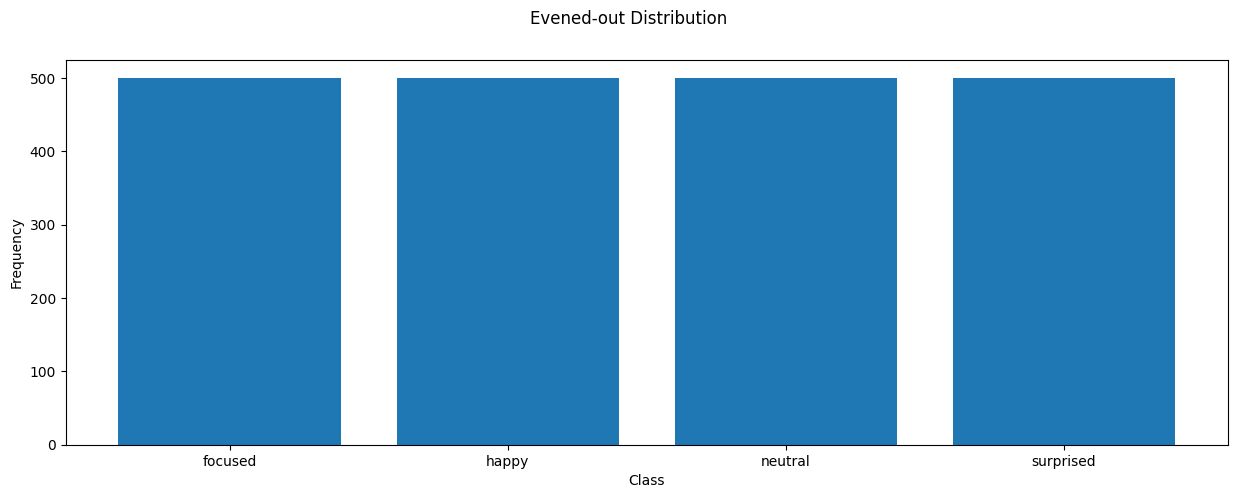

In [43]:
#make 3x4 plot for each folder
fig, axs = plt.subplots(1, 1)
fig.set_size_inches(15, 5)
fig.suptitle('Evened-out Distribution')



#plot a bar chart for each key based on the len() value
lenghts = []
labels = []
for key in dict_images:
    lenghts.append(len(dict_images[key]))
    labels.append(key)
axs.bar(labels, lenghts)


#set x-label
axs.set_xlabel('Class')

#set y-label
axs.set_ylabel('Frequency')

plt.savefig('../preprocessing/evened_out_distribution.png')




In [44]:
#look through each folder in the array, and count the number of files in each folder
os.chdir("../unprocessed_merged_dataset")
directories_to_explore = {'focused': 0, 'happy': 0, 'neutral' : 0, 'surprised': 0}


for folder in os.listdir(os.getcwd()):
    # print(folder)
    if (folder in directories_to_explore.keys()):
        # explore all subfolders
        for subfolder in os.listdir(folder):
            directories_to_explore[folder] = directories_to_explore[folder] + len(os.listdir(folder + "/" + subfolder))
            # print("Number of files in " + folder + "/" + subfolder + ": " + str(len(os.listdir(folder + "/" + subfolder))))
    
for key in directories_to_explore:
    print(key)
    print(directories_to_explore[key])


focused
510
happy
607
neutral
831
surprised
683


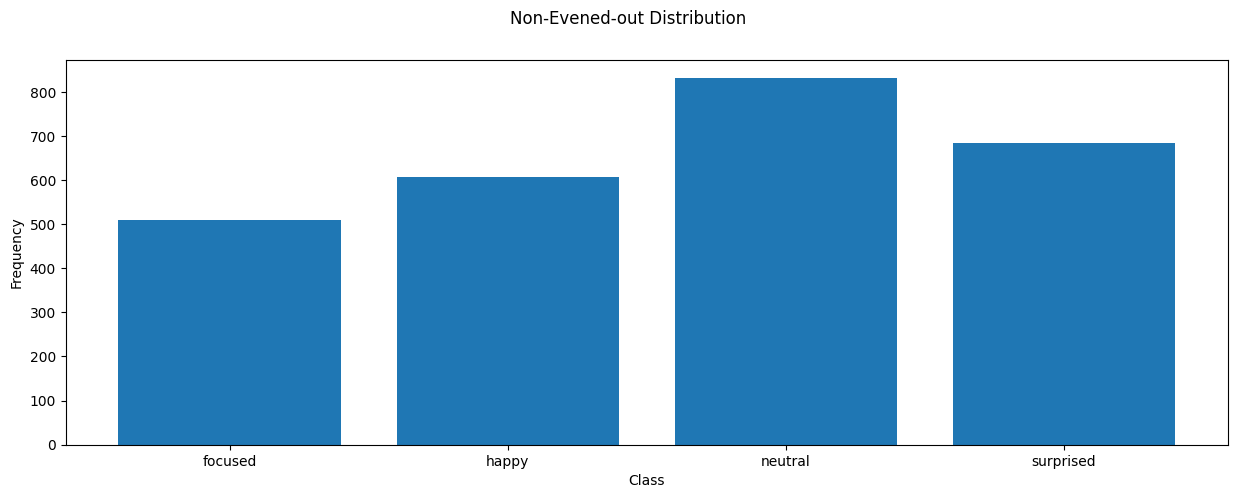

In [45]:
#generate a bar chart for the number of files in each folder
#make 3x4 plot for each folder
fig, axs = plt.subplots(1, 1)
fig.set_size_inches(15, 5)
fig.suptitle('Non-Evened-out Distribution')


#plot a bar chart for each key based on the len() value
lenghts = []
labels = []
for key in directories_to_explore:
    lenghts.append(directories_to_explore[key])
    labels.append(key)
axs.bar(labels, lenghts)


#set x-label
axs.set_xlabel('Class')

#set y-label
axs.set_ylabel('Frequency')

plt.savefig('../preprocessing/non_evened_out_distribution.png')
